<a href="https://colab.research.google.com/github/Joykareko/Data-Science-Projects/blob/main/Iris_Classification_Dataset_ML_Project_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
#importing the dataset
iris_dataset = sklearn.datasets.load_iris()

In [5]:
#importing the dataset as pandas dataframe
iris_dataset_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_dataset_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
#adding the target column to the dataframe
iris_dataset_df['Class'] = iris_dataset.target

In [7]:
iris_dataset_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Class is--->
2 ----> Iris Virginica
1 ----> Iris Versicolour
0 ----> Iris  Setosa

In [8]:
#checking out the iris class
iris_dataset_df['Class'].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

In [9]:
#shape of the data
iris_dataset_df.shape

(150, 5)

In [10]:
iris_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
#checking for null values
iris_dataset_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

In [12]:
#summary statistics
iris_dataset_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
#understanding if any correlation exists
correlation = iris_dataset_df.corr()

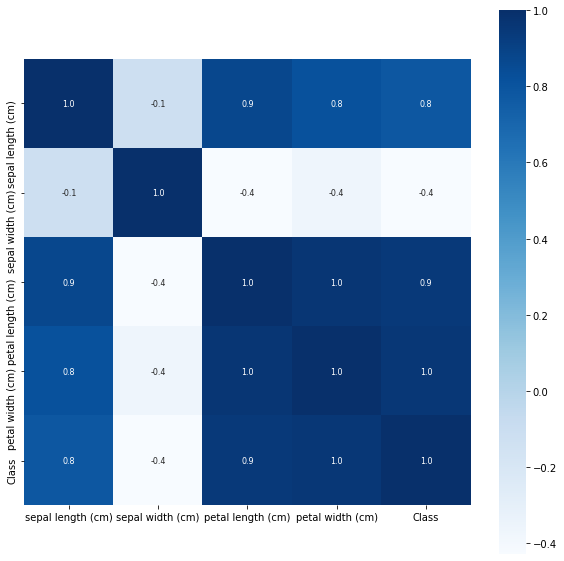

In [14]:
#shows the variables are very much significant
plt.figure(figsize = (10,10))
sns.heatmap(correlation,cbar = True, square = True , fmt = '.1f',annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [15]:
#splitting the dataset into X and Y
X = iris_dataset_df.drop(columns = 'Class', axis = 1)
Y = iris_dataset_df['Class']

In [16]:
print(X.shape, Y.shape)

(150, 4) (150,)


In [18]:
#splitting the dataset to training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [21]:
classifier = svm.SVC(kernel = 'rbf')
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
#creating predictions and evaluating accuracy of the model
training_pred = classifier.predict(X_train)
score1 = accuracy_score(training_pred,Y_train)
print('Accuracy Score:',score1)


Accuracy Score: 0.9666666666666667


In [23]:
testing_pred = classifier.predict(X_test)
score2 = accuracy_score(testing_pred,Y_test)
print('Accuracy Score:',score2)

Accuracy Score: 1.0


In [24]:
#making a prediction system
input_data = (5.1,3.5,1.4,0.2)
#changing the data as a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshaping the array to perdict for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [28]:
prediction = classifier.predict(input_data_reshaped)
if (prediction[0]==0):
  print(prediction,'class:Iris Sertosa')
if (prediction[0]==1):
  print(prediction,'class: Iris Versicolour')
if (prediction[0]==2):
  print('class: Iris Virginica')

[0] class:Iris Sertosa


In [32]:
#making a prediction system
input_data = (4.9,3.1,5.0,0.2)
#changing the data as a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshaping the array to perdict for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [33]:
prediction = classifier.predict(input_data_reshaped)
if (prediction[0]==0):
  print(prediction,'class:Iris Sertosa')
if (prediction[0]==1):
  print(prediction,'class: Iris Versicolour')
if (prediction[0]==2):
  print('class: Iris Virginica')

[1] class: Iris Versicolour
